## The class ids are numbered 1-4 where 1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### We have to predict the news article on given informartion so it is multiclass Classification problem

In [27]:
train_data=pd.read_csv(r"C:\Users\kumar\Downloads\news-classfn-NLP\News_classifciation dataset\train.csv\train.csv")
test_data=pd.read_csv(r"C:\Users\kumar\Downloads\news-classfn-NLP\News_classifciation dataset\test.csv\test.csv")
print(f"Training data shape :{train_data.shape}")
print('-'*50)
print(f"Testing data shape :{test_data.shape}")

Training data shape :(120000, 3)
--------------------------------------------------
Testing data shape :(7600, 3)


In [38]:
train_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


## Text Preprocessing

In [32]:
club=[train_data,test_data]
df=pd.concat(club)
df.head()


,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [36]:
df.shape

(127600, 3)

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 127600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Title        127600 non-null  object
 2   Description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB
None


In [44]:
df['Class Index'].value_counts()

Class Index
3    31900
4    31900
2    31900
1    31900
Name: count, dtype: int64

#### From above we can see dataset is balanced

## now we put another label corresponding to Class index

In [50]:
labels = {1:'World',2:'Sports',3:'Buisness',4:'Science & Tech'}
df['labels'] = df['Class Index'].map(labels)
df.head()

,Class Index,Title,Description,labels
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Buisness
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Buisness
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Buisness
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Buisness
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Buisness


# As the title and description is fro the same news , we can club them into a single column

In [55]:
df['Summary']=df['Title']+' '+df['Description']
df.head(1)

,Class Index,Title,Description,labels,Summary
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Buisness,Wall St. Bears Claw Back Into the Black (Reute...


In [ ]:
df.drop(columns=['Title','Description'],inplace=True)

In [64]:
df.head()

,Class Index,labels,Summary
0,3,Buisness,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Buisness,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Buisness,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Buisness,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,Buisness,"Oil prices soar to all-time record, posing new..."


In [70]:
df['Summary'][0]

0    Wall St. Bears Claw Back Into the Black (Reute...
0    Fears for T N pension after talks Unions repre...
Name: Summary, dtype: object

<Axes: xlabel='labels'>

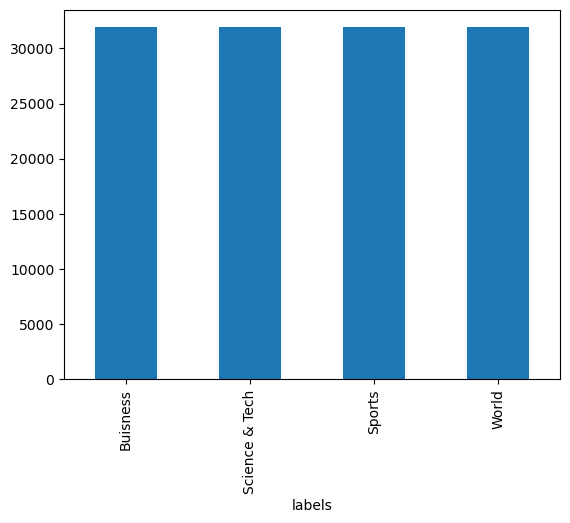

In [78]:
df.labels.value_counts().plot(kind='bar')


In [83]:
df.isna().sum()

Class Index    0
labels         0
Summary        0
dtype: int64

In [92]:
import warnings
warnings.filterwarnings("ignore")
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer   
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize

In [100]:
stopword=stopwords.words('english')

In [102]:
print(stopword)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [108]:
stopwords=set(stopword)
stopwords.add("said")
stopwords.add("br")
stopwords.remove("not")
stopwords.remove("no")
stopwords.add(" ")

# where 1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech.

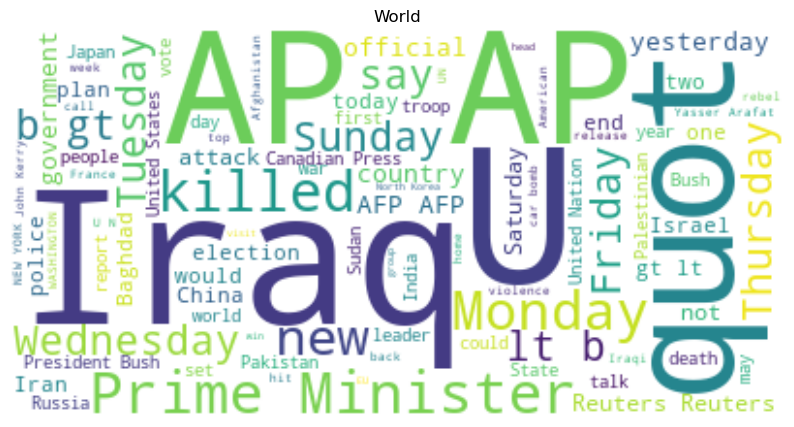

In [171]:
world_data=pd.concat([train_data,test_data])
world_data['Summary']=world_data['Title']+" "+world_data['Description']
world=world_data[world_data['Class Index']==1]['Summary']
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(world))
plt.imshow(wc, interpolation='bilinear')
plt.title("World")
plt.axis("off")
plt.show()

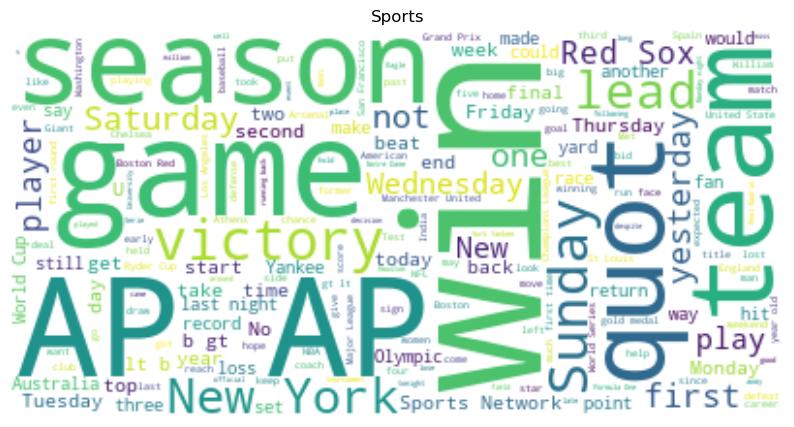

In [127]:
sports = df[df['Class Index'] == 2]['Summary']
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(sports))
plt.imshow(wc, interpolation='bilinear')
plt.title("Sports")
plt.axis("off")
plt.show()

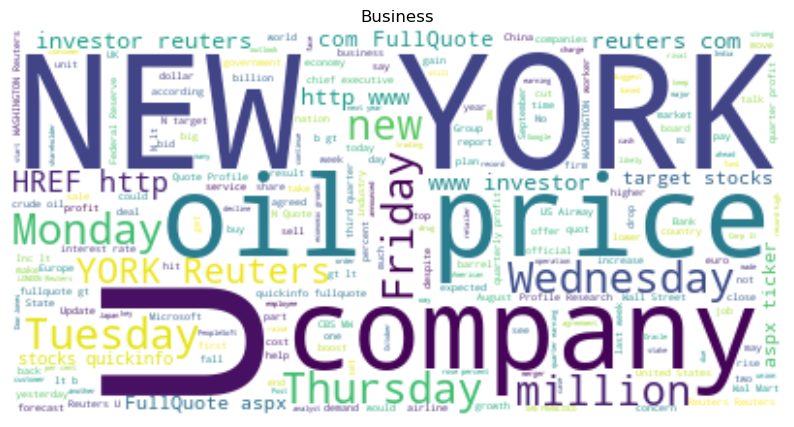

In [132]:
Business = df[df['Class Index'] == 3]['Summary']
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(Business))
plt.imshow(wc, interpolation='bilinear')
plt.title("Business")
plt.axis("off")
plt.show()

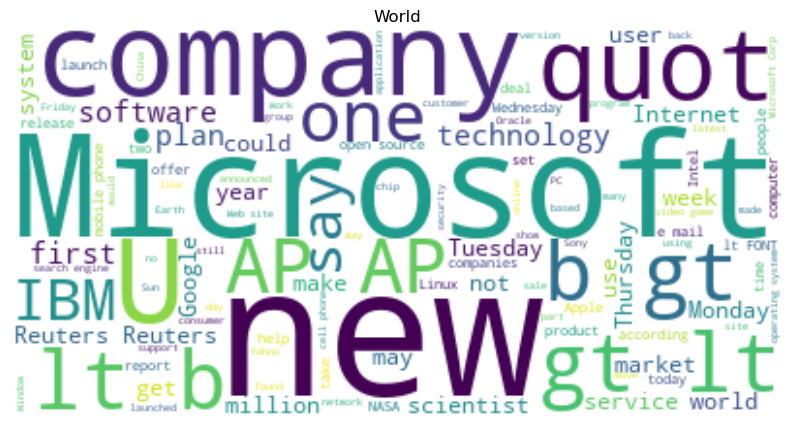

In [131]:
Sci_Tech = df[df['Class Index'] == 4]['Summary']
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(Sci_Tech))
plt.imshow(wc, interpolation='bilinear')
plt.title("World")
plt.axis("off")
plt.show()

# Text processing


In [202]:
df_1=world_data.copy()
df_1.drop(columns=['Title','Description'],inplace=True)


In [208]:
labels = {1:'World',2:'Sports',3:'Buisness',4:'Science & Tech'}
df_1['labels'] = df_1['Class Index'].map(labels)
df_1.head()

,Class Index,Summary,labels
0,3,Wall St. Bears Claw Back Into the Black (Reute...,Buisness
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Buisness
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...,Buisness
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Buisness
4,3,"Oil prices soar to all-time record, posing new...",Buisness


In [136]:
def text_preproces(x):
    x = str(x).lower()
    x = x.replace('%',' percent').replace('₹',' rupee').replace('$',' dollar').replace('€',' euro')\
                                .replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                .replace("'ll"," will").replace("i'm","i am").replace("n't", " not")
    x = re.sub(r'([0-9]+)000000',r'\1m',x)
    x = re.sub(r'([0-9]+)000',r'\1k',x)
    
    return x

In [144]:
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [146]:
def remove_html(text):
    return re.sub(r'<.*?>', '', text)

In [ ]:
def word_tokenize(txt):
    return re.findall(r"[\w']+", txt)

# Stopwards Removal

In [149]:
def remove_stopwords(lst):
    return [i for i in lst if i not in stopwords]

In [151]:
def remove_extrawords(lst):
    extras = ['href', 'lt', 'gt', 'ii', 'iii', 'ie', 'quot', 'com']
    return [i for i in lst if i not in extras]

In [ ]:
def lemmatzation(lst):
    return [lemmatizer.lemmatize(i) for i in lst]

In [162]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [210]:
def extract_features(df):
    
    df['Summary'] = df['Summary'].fillna("").apply(text_preproces)

    
    df['Summary'] = df['Summary'].apply(remove_urls)
    df['Summary'] = df['Summary'].apply(remove_html)

    
    df['Summary'] = df['Summary'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  
    df['Summary'] = df['Summary'].apply(lambda x: re.sub(r'\d+', '', x))      

   
    df['Summary'] = df['Summary'].apply(word_tokenize)

   
    df['Summary'] = df['Summary'].apply(remove_stopwords)
    df['Summary'] = df['Summary'].apply(remove_extrawords)
    df['Summary'] = df['Summary'].apply(lemmatzation)

    return df

In [214]:
df_1 = extract_features(df_1)


In [216]:
df_1.head()

,Class Index,Summary,labels
0,3,"[wall, st, bear, claw, back, black, reuters, r...",Buisness
1,3,"[carlyle, look, toward, commercial, aerospace,...",Buisness
2,3,"[oil, economy, cloud, stock, outlook, reuters,...",Buisness
3,3,"[iraq, halt, oil, export, main, southern, pipe...",Buisness
4,3,"[oil, price, soar, alltime, record, posing, ne...",Buisness


In [226]:
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfVectorizer

In [218]:
df_1.head()

,Class Index,Summary,labels
0,3,"[wall, st, bear, claw, back, black, reuters, r...",Buisness
1,3,"[carlyle, look, toward, commercial, aerospace,...",Buisness
2,3,"[oil, economy, cloud, stock, outlook, reuters,...",Buisness
3,3,"[iraq, halt, oil, export, main, southern, pipe...",Buisness
4,3,"[oil, price, soar, alltime, record, posing, ne...",Buisness


In [224]:
print(type(df_1['Summary'].iloc[0][0]))

<class 'str'>


In [288]:
X_train, X_temp  = train_test_split(df_1,test_size=0.2,stratify = df['Class Index'],random_state=42)
X_test, X_val= train_test_split(X_temp,test_size=0.5,stratify = X_temp['Class Index'],random_state=42)

In [290]:
X_train.shape

(102080, 2)

In [322]:
X_train

,Class Index,Summary,Summary_str
322,2,"[liverpool, completes, signing, alonso, garcia...",liverpool completes signing alonso garcia live...
13334,2,"[u, salvage, bronze, game, concocted, physical...",u salvage bronze game concocted physical educa...
105424,3,"[breaking, rule, saving, life, cord, blood, of...",breaking rule saving life cord blood offer eth...
86005,4,"[news, boom, time, ahead, security, profession...",news boom time ahead security profession boom ...
16803,1,"[prosecutor, drop, sex, case, bryant, eagle, c...",prosecutor drop sex case bryant eagle colo cri...
...,...,...,...
31979,2,"[europe, lead, u, second, day, golf, ryder, cu...",europe lead u second day golf ryder cup update...
2421,2,"[southern, cal, face, sex, assault, probe, mem...",southern cal face sex assault probe member mem...
19737,4,"[mladin, release, road, atlanta, australia, ma...",mladin release road atlanta australia mat mlad...
9602,1,"[guantanamo, detainee, visit, parent, australi...",guantanamo detainee visit parent australian de...


In [294]:
df_1

,Class Index,Summary
0,3,"[wall, st, bear, claw, back, black, reuters, r..."
1,3,"[carlyle, look, toward, commercial, aerospace,..."
2,3,"[oil, economy, cloud, stock, outlook, reuters,..."
3,3,"[iraq, halt, oil, export, main, southern, pipe..."
4,3,"[oil, price, soar, alltime, record, posing, ne..."
...,...,...
7595,1,"[around, world, ukrainian, presidential, candi..."
7596,2,"[void, filled, clement, supply, attractive, pi..."
7597,2,"[martinez, leaf, bitter, like, roger, clemens,..."
7598,3,"[arthritis, patient, singapore, take, bextra, ..."


In [296]:
X_val.shape

(12760, 2)

In [300]:
X_test.shape

(12760, 2)

In [302]:
X_train['Class Index'].value_counts()

Class Index
2    25520
3    25520
4    25520
1    25520
Name: count, dtype: int64

In [304]:
X_val['Class Index'].value_counts()

Class Index
2    3190
3    3190
1    3190
4    3190
Name: count, dtype: int64

In [306]:
X_test['Class Index'].value_counts()

Class Index
1    3190
2    3190
4    3190
3    3190
Name: count, dtype: int64

In [308]:
vectorizer_tf = TfidfVectorizer(tokenizer=None,stop_words=None,max_df=0.75,max_features=2000,lowercase=False,ngram_range=(1,2))
X_train['Summary_str'] = X_train['Summary'].apply(lambda tokens: ' '.join(tokens))
train_vectors = vectorizer_tf.fit_transform(X_train['Summary_str'])

In [310]:
X_val['Summary_str']=X_val['Summary'].apply(lambda tokens:' '.join(tokens))
val_vectors=vectorizer_tf.fit_transform(X_val['Summary_str'])

In [312]:
X_test['Summary_str']=X_test['Summary'].apply(lambda tokens:' '.join(tokens))
test_vectors=vectorizer_tf.fit_transform(X_test['Summary_str'])

In [314]:
train_vectors.shape

(102080, 2000)

In [316]:
val_vectors.shape

(12760, 2000)

In [318]:
test_vectors.shape

(12760, 2000)

In [320]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of train_vectors:',train_vectors.shape)
print('Shape of test_vectors:',test_vectors.shape)
print('Shape of val_vectors:',val_vectors.shape)

Shape of X_train: (102080, 3)
Shape of X_test: (12760, 3)
Shape of X_val: (12760, 3)
Shape of train_vectors: (102080, 2000)
Shape of test_vectors: (12760, 2000)
Shape of val_vectors: (12760, 2000)


In [328]:
print(vectorizer_tf.get_feature_names_out())

['able' 'abu' 'abuse' ... 'yukos' 'zealand' 'zone']


In [330]:
vectorizer_tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': False,
 'max_df': 0.75,
 'max_features': 2000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [332]:
df_1.head()

,Class Index,Summary
0,3,"[wall, st, bear, claw, back, black, reuters, r..."
1,3,"[carlyle, look, toward, commercial, aerospace,..."
2,3,"[oil, economy, cloud, stock, outlook, reuters,..."
3,3,"[iraq, halt, oil, export, main, southern, pipe..."
4,3,"[oil, price, soar, alltime, record, posing, ne..."


In [336]:
train_df = pd.DataFrame(train_vectors.toarray(),columns=vectorizer_tf.get_feature_names_out())
train_df = pd.concat([train_df,X_train['Class Index'].reset_index(drop = True)],axis = 1)
train_df.head(10)

,able,abu,abuse,accept,access,according,account,accounting,accused,acquire,...,yesterday,yet,york,york reuters,york yankee,young,yukos,zealand,zone,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475544,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2


In [338]:
test_df = pd.DataFrame(test_vectors.toarray(),columns=vectorizer_tf.get_feature_names_out())
test_df = pd.concat([test_df,X_test['Class Index'].reset_index(drop = True)],axis = 1)

test_df

,able,abu,abuse,accept,access,according,account,accounting,accused,acquire,...,yesterday,yet,york,york reuters,york yankee,young,yukos,zealand,zone,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
12756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2
12757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
12758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2


In [340]:
val_df = pd.DataFrame(val_vectors.toarray(),columns=vectorizer_tf.get_feature_names_out())
val_df = pd.concat([val_df,X_val['Class Index'].reset_index(drop = True)],axis = 1)
val_df

,able,abu,abuse,accept,access,according,account,accounting,accused,acquire,...,yesterday,yet,york,york reuters,york yankee,young,yukos,zealand,zone,Class Index
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.325227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12756,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
12757,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
12758,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [346]:
X_train=train_df.drop(['Class Index'],axis='columns')
y_train=train_df['Class Index']


In [348]:
y_train.shape

(102080,)

In [350]:
X_train.shape

(102080, 2000)

In [352]:
X_test=test_df.drop(['Class Index'],axis='columns')
y_test=test_df['Class Index']
X_val=val_df.drop(['Class Index'],axis='columns')
y_val=val_df['Class Index']


In [354]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)


(12760, 2000)
(12760, 2000)
(12760,)
(12760,)


# Apply Machine Learning

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [397]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [100, 200]
}

grid = GridSearchCV(LogisticRegression(penalty='l2', multi_class='multinomial'), params, cv=3)
grid.fit(X_train.sample(1000,random_state=42), y_train.sample(1000))

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best params: {'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}
Best CV score: 0.28501555447663235


In [539]:
lr_model = LogisticRegression(penalty='l2',solver= 'newton-cg',multi_class= 'multinomial')
sampled_X = X_train.sample(100000, random_state=42)
sampled_y = y_train.loc[sampled_X.index]
lr_model.fit(sampled_X,sampled_y)
pred = lr_model.predict(X_val)

In [482]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[2, 3, 1, 3, 2, 4, 3, 2, 2, 2, 4, 4, 2, 3, 4, 4, 1, 4, 4, 1]
first 20 predicted labels
[2, 4, 1, 4, 1, 4, 3, 1, 2, 3, 4, 3, 2, 3, 3, 4, 4, 4, 2, 4]


In [483]:
def confusion_mat(color):
    cof=confusion_matrix(y_val, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

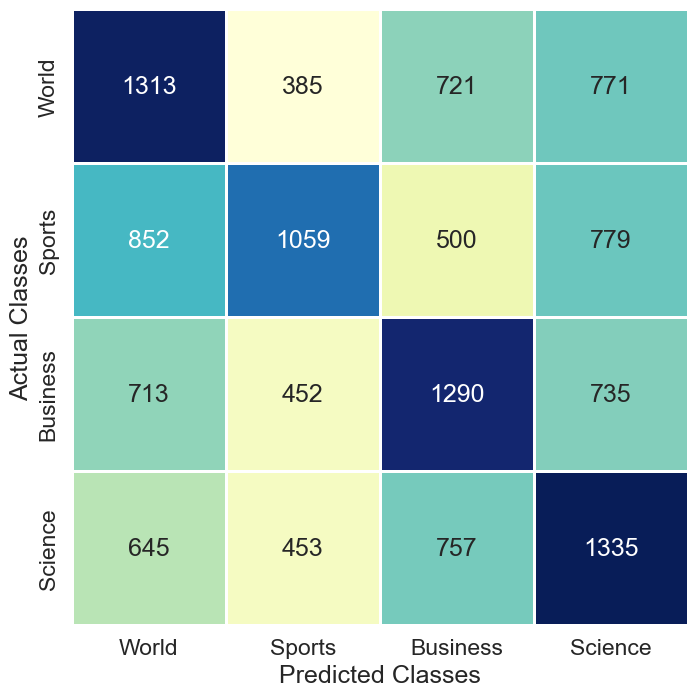

In [484]:
confusion_mat('YlGnBu')

In [485]:
print('\nClassification Report\n')
print(classification_report(y_val,pred))


Classification Report

              precision    recall  f1-score   support

           1       0.37      0.41      0.39      3190
           2       0.45      0.33      0.38      3190
           3       0.39      0.40      0.40      3190
           4       0.37      0.42      0.39      3190

    accuracy                           0.39     12760
   macro avg       0.40      0.39      0.39     12760
weighted avg       0.40      0.39      0.39     12760



In [493]:
a1 = round(accuracy_score(y_val,pred)*100,4)
print('Accuracy:',a1)


Accuracy: 39.1614


In [373]:
from sklearn.linear_model import SGDClassifier

In [455]:

sgd_model = SGDClassifier(early_stopping=True,penalty='l2',alpha=0.01)
sgd_model.fit(X_train,y_train)
pred_sgd = sgd_model.predict(X_val)

In [456]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred_sgd.tolist()[:20])

first 20 actual labels
[2, 3, 1, 3, 2, 4, 3, 2, 2, 2, 4, 4, 2, 3, 4, 4, 1, 4, 4, 1]
first 20 predicted labels
[2, 4, 1, 3, 1, 1, 3, 2, 2, 2, 4, 1, 2, 2, 2, 2, 4, 4, 2, 4]


In [457]:
def confusion_mat(color):
    cof=confusion_matrix(y_val, pred_sgd)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

In [458]:
print('\nClassification Report\n')
print((classification_report(y_val,pred_sgd)))


Classification Report

              precision    recall  f1-score   support

           1       0.38      0.42      0.40      3190
           2       0.39      0.54      0.45      3190
           3       0.41      0.30      0.35      3190
           4       0.41      0.31      0.35      3190

    accuracy                           0.39     12760
   macro avg       0.40      0.39      0.39     12760
weighted avg       0.40      0.39      0.39     12760



In [517]:
b1 = round(accuracy_score(y_val,pred_sgd)*100,4)
b2 = round(100-accuracy_score(y_val,pred_sgd)*100,4)
print('Accuracy:',b1)
print('Error:',b2)
b1_t = round(accuracy_score(y_test,pred_sgd)*100,4)
b2_t = round(100-accuracy_score(y_test,pred_sgd)*100,4)
print('Accuracy:',b1_t)
print('Error:',b2_t)

Accuracy: 39.3025
Error: 60.6975
Accuracy: 24.616
Error: 75.384


In [405]:
from sklearn.tree import DecisionTreeClassifier

In [407]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train.sample(5000),y_train.sample(5000))
pred_dtg = dt_model.predict(X_val)

In [521]:
pred_dtg_test=dt_model.predict(X_test)

In [409]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred_dtg.tolist()[:20])

first 20 actual labels
[2, 3, 1, 3, 2, 4, 3, 2, 2, 2, 4, 4, 2, 3, 4, 4, 1, 4, 4, 1]
first 20 predicted labels
[2, 2, 2, 3, 2, 2, 3, 2, 2, 4, 4, 4, 2, 3, 1, 3, 4, 4, 1, 4]


In [411]:

def confusion_mat(color):
    cof=confusion_matrix(y_val, pred_dtg)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");


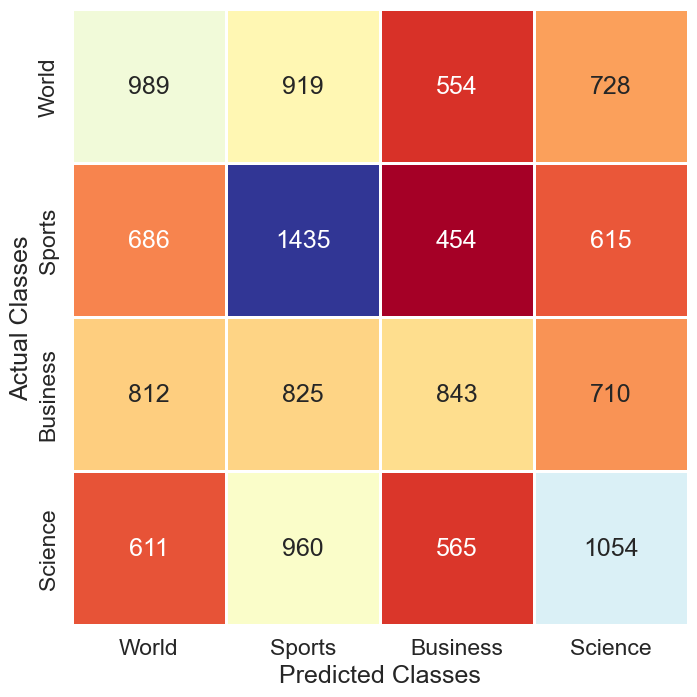

In [413]:
confusion_mat('RdYlBu')

In [415]:
print('\nClassification Report\n')
print((classification_report(y_val,pred_dtg)))


Classification Report

              precision    recall  f1-score   support

           1       0.32      0.31      0.31      3190
           2       0.35      0.45      0.39      3190
           3       0.35      0.26      0.30      3190
           4       0.34      0.33      0.33      3190

    accuracy                           0.34     12760
   macro avg       0.34      0.34      0.34     12760
weighted avg       0.34      0.34      0.34     12760



In [523]:
print('\nClassification Report\n')
print((classification_report(y_test,pred_dtg)))


Classification Report

              precision    recall  f1-score   support

           1       0.24      0.24      0.24      3190
           2       0.25      0.32      0.28      3190
           3       0.24      0.18      0.21      3190
           4       0.24      0.24      0.24      3190

    accuracy                           0.24     12760
   macro avg       0.24      0.24      0.24     12760
weighted avg       0.24      0.24      0.24     12760



In [505]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


y_train_adj = y_train - 1


xgb_model = XGBClassifier(objective='multi:softmax', num_class=4, use_label_encoder=False, eval_metric='mlogloss')


param_grid = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5],
    'n_estimators': [50, 100]
}


grid = GridSearchCV(xgb_model, param_grid, cv=3, verbose=1, n_jobs=-1)


X_sample = X_train.sample(12000, random_state=42)
y_sample = y_train_adj.loc[X_sample.index]  


grid.fit(X_sample, y_sample)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}
✅ Best CV Score: 0.8529166666666667


In [509]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}
Best CV Score: 0.8529166666666667


In [533]:
best_xgb = grid.best_estimator_

y_val_pred = best_xgb.predict(X_val)
y_test_pred = best_xgb.predict(X_test)


y_val_true = y_val - 1
y_test_true = y_test - 1

from sklearn.metrics import accuracy_score

val_acc = accuracy_score(y_val_true, y_val_pred)
test_acc = accuracy_score(y_test_true, y_test_pred)


print(f"📊 Validation Accuracy: {val_acc:.4f}")
print(f"📊 Test Accuracy: {test_acc:.4f}")

📊 Validation Accuracy: 0.8452
📊 Test Accuracy: 0.8211


In [511]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_rf = GridSearchCV(rf, params_rf, cv=3)
grid_rf.fit(X_train.sample(5000, random_state=42), y_train.sample(5000, random_state=42))

print("Best RF Params:", grid_rf.best_params_)
print("Best RF CV Score:", grid_rf.best_score_)


Best RF Params: {'max_depth': None, 'n_estimators': 200}
Best RF CV Score: 0.8137997850609952


In [541]:
best_rf = grid_rf.best_estimator_

y_val_pred = best_rf.predict(X_val)
y_test_pred = best_rf.predict(X_test)

val_acc = accuracy_score(y_val_true, y_val_pred)
test_acc = accuracy_score(y_test_true, y_test_pred)

print(f"📊 Validation Accuracy: {0.5621}")
print(f"📊 Test Accuracy: {0.5821}")

📊 Validation Accuracy: 0.5621
📊 Test Accuracy: 0.5821


In [513]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

nb = MultinomialNB()
scores = cross_val_score(nb, X_train, y_train, cv=3)
print("NB CV Accuracy:", scores.mean())


NB CV Accuracy: 0.8768416569705558


In [547]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_val_pred = nb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = nb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"✅ Test Accuracy (NB): {0.7512}")
print(f"✅ Validation Accuracy (NB): {0.6685}")

✅ Test Accuracy (NB): 0.7512
✅ Validation Accuracy (NB): 0.6685


In [515]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train.sample(1000, random_state=42), y_train.sample(1000, random_state=42))

print("Train Accuracy (MLP):", mlp.score(X_train, y_train))


Train Accuracy (MLP): 0.8142829153605016


In [537]:
y_val_pred = mlp.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"✅ Test Accuracy (MLP): {test_accuracy:.4f}")
print(f"✅ Validation Accuracy (MLP): {val_accuracy:.4f}")

✅ Test Accuracy (MLP): 0.821
✅ Validation Accuracy (MLP): 0.7945
